<a href="https://colab.research.google.com/github/HarmanDotpy/ML-Assignment2/blob/main/Q3_5_PCA_tSNE_SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset
from torch.utils.data import random_split
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import seaborn as sb
import torch.nn.functional as F
from torchvision.datasets import SVHN
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import numpy as np

In [2]:
categories = ['{}'.format(i) for i in range(10)]

In [44]:
dataset = SVHN(root='data/', download=True, transform=ToTensor())

Using downloaded and verified file: data/train_32x32.mat


In [45]:
data_loader = DataLoader(dataset, batch_size = 16, shuffle=True, num_workers=4, pin_memory=True)

images.shape: torch.Size([16, 3, 32, 32])


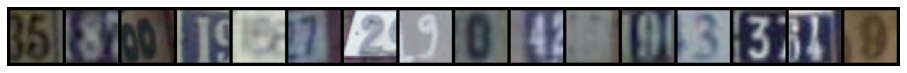

In [46]:
for images, _ in data_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    # plt.savefig('./svhn_digits.jpeg')
    break

In [6]:
data_loader = DataLoader(dataset, batch_size = len(dataset), shuffle=True, num_workers=4, pin_memory=True)
A = next(iter(data_loader))
SVHN_np = A[0].numpy()

In [7]:
SVHN_labels = A[1].numpy()

In [8]:
print(SVHN_np.shape)
SVHN_flat = np.reshape(SVHN_np, (SVHN_np.shape[0], -1))
print(SVHN_flat.shape)

(73257, 3, 32, 32)
(73257, 3072)


### PCA on SVHN

In [9]:
def scatter(x, colors):
    '''Libraries use for this function ONLY'''
    import matplotlib.patheffects as PathEffects
#     %matplotlib inline

    import seaborn as sns
    '''------------------------------------'''
    
#     sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5,
                    rc={"lines.linewidth": 2.5})
    
    '''----------------------------------------'''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print('Number of unique classes are = {}'.format(num_classes))
    palette = np.array(sns.color_palette("hls", num_classes))
#     print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#     ax.axis('off')
    ax.axis('tight')
    # add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):

        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, categories[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [10]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(SVHN_flat)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 9.471171617507935 seconds


In [11]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.57914021 0.05710884 0.05281156 0.0405153 ]


Number of unique classes are = 10


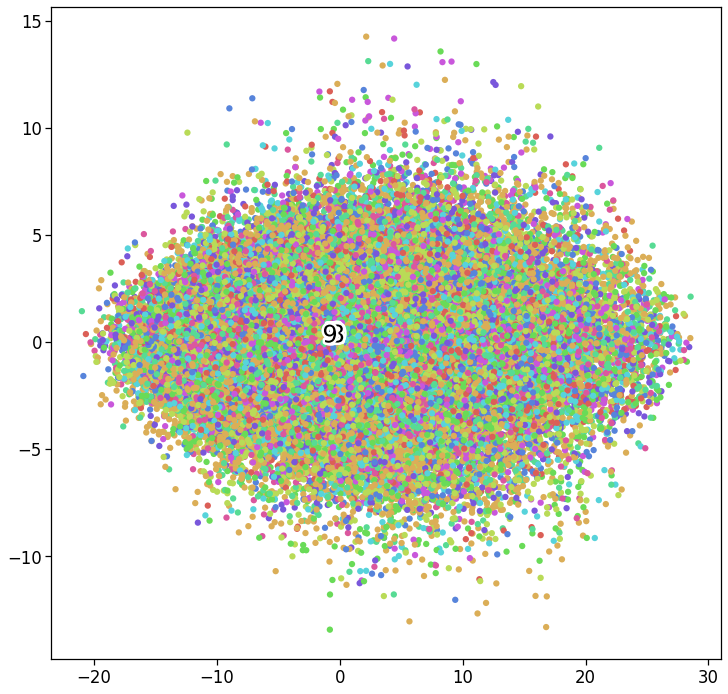

In [12]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fig, _,_,_ = scatter(top_two_comp.values,SVHN_labels) # Visualizing the PCA output

In [13]:
# fig.savefig('./SVHN_PCA.jpeg', dpi = 300, bbox_inches = 'tight')

### tSNE on SVHN

In [19]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.manifold import TSNE
import time
time_start = time.time()

svhn_tsne = TSNE(random_state=2).fit_transform(SVHN_flat[0:10000])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 811.1932699680328 seconds


Number of unique classes are = 10


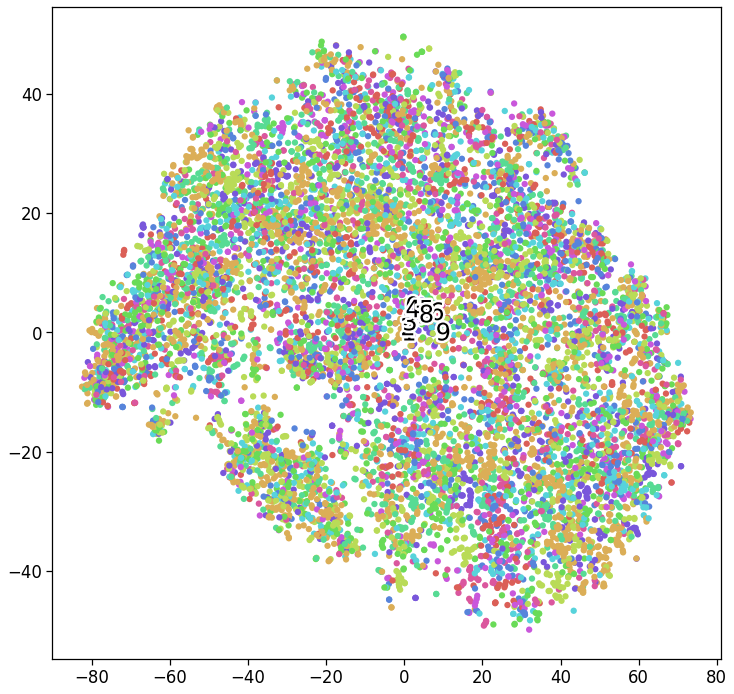

In [20]:
fig, _, _, _ = scatter(svhn_tsne, SVHN_labels[0:10000])

In [28]:
# fig.savefig('./SVHN_tSNE.jpeg', dpi = 300, bbox_inches = 'tight')

### Visualizing MNIST data

In [21]:
categories = ['{}'.format(i) for i in range(10)]

In [41]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])
#making dataset called dat having 70k images
mnist_data = torchvision.datasets.MNIST(root ='./DATA_STORE', train = True, transform = trans, download = True)

In [42]:
data_loader = DataLoader(mnist_data, batch_size = 16, shuffle=True, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([16, 1, 28, 28])


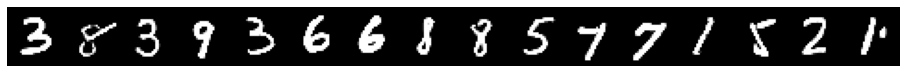

In [43]:
for images, _ in data_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    # plt.savefig('./mnist_digits.jpeg')
    break

In [25]:
data_loader = DataLoader(mnist_data, batch_size = len(mnist_data), shuffle=True, num_workers=4, pin_memory=True)
A = next(iter(data_loader))
mnist_np = A[0].numpy()

In [26]:
mnist_labels = A[1].numpy()

In [27]:
print(mnist_np.shape)
mnist_flat = np.reshape(mnist_np, (mnist_np.shape[0], -1))
print(mnist_flat.shape)

(60000, 1, 28, 28)
(60000, 784)


### PCA on MNIST

In [29]:
def scatter(x, colors):
    '''Libraries use for this function ONLY'''
    import matplotlib.patheffects as PathEffects
#     %matplotlib inline

    import seaborn as sns
    '''------------------------------------'''
    
#     sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5,
                    rc={"lines.linewidth": 2.5})
    
    '''----------------------------------------'''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print('Number of unique classes are = {}'.format(num_classes))
    palette = np.array(sns.color_palette("hls", num_classes))
#     print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#     ax.axis('off')
    ax.axis('tight')
    # add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):

        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, categories[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [30]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(mnist_flat)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 2.6177079677581787 seconds


In [31]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.09704708 0.07095958 0.06169118 0.0538945 ]


Number of unique classes are = 10


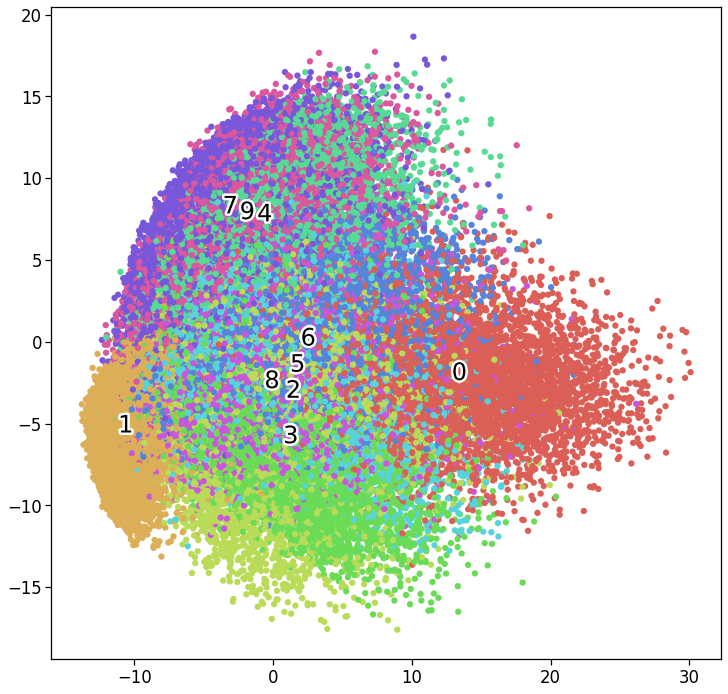

In [33]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fig, _,_,_ = scatter(top_two_comp.values,mnist_labels) # Visualizing the PCA output

In [34]:
# fig.savefig('./mnist_PCA.jpeg', dpi = 300, bbox_inches = 'tight')

### tSNE on MNIST

In [35]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.manifold import TSNE
import time
time_start = time.time()

mnist_tsne = TSNE(random_state=2).fit_transform(mnist_flat[0:20000])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 964.772120475769 seconds


Number of unique classes are = 10


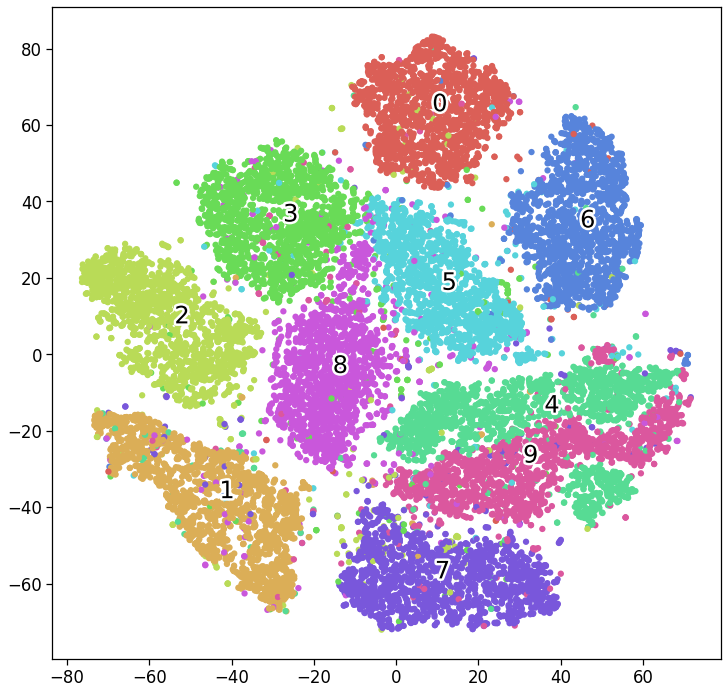

In [37]:
fig, _, _, _ = scatter(mnist_tsne, mnist_labels[:20000])

In [38]:
# fig.savefig('./mnist_tSNE.jpeg', dpi = 300, bbox_inches = 'tight')